In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import sympy
import sympy.stats

import common

In [2]:
num_dims = 10

In [3]:
theta_0 = np.matrix(np.ones(num_dims)).T
theta_star = np.matrix(np.zeros(num_dims)).T

In [4]:
def quartic_loss_func(theta, b_mat=None, rand_vec=None):
    '''From exercise 5.5'''
    num_dims = theta.size
    if b_mat is None:
        b_mat = np.matrix(np.eye(num_dims))
    if rand_vec is None:
        rand_vec = np.matrix(np.zeros([num_dims,1]))
    
    loss_val = (
        np.sum(np.power(theta[:num_dims//2], 4))
        +
        (theta.T @ b_mat @ theta)[0,0]
        +
        (theta.T @ rand_vec)[0,0]
    )

    return loss_val

In [5]:
def quartic_grad_loss_func(theta, b_mat=None, rand_vec=None):
    '''From exercise 5.5'''
    num_dims = theta.size
    if b_mat is None:
        b_mat = np.matrix(np.eye(num_dims))
    if rand_vec is None:
        rand_vec = np.matrix(np.zeros([num_dims,1]))
    
    temp_vec = np.zeros([num_dims,1])
    temp_vec[:num_dims//2] = 3 * np.power(theta[:num_dims//2], 3)
    
    grad_loss_val = (
        temp_vec
        +
        2 * b_mat @ theta
        +
        rand_vec
    )
    return grad_loss_val

In [6]:
def specific_quartic_grad_loss_func(theta, random_state=None, b_mat=None):
    num_dims = theta.size
    sigma = 0.1
    noise_dist = sympy.stats.MultivariateNormal(
        r'\boldsymbol{e}',
        mu=sympy.zeros(num_dims,1),
        sigma=sigma**2 * sympy.eye(num_dims),
    )

    rand_vec=np.matrix(sympy.stats.sample(
        noise_dist,
        seed=random_state,
    )).T

    return quartic_grad_loss_func(
        theta,
        b_mat=b_mat,
        rand_vec=rand_vec,
    )

In [7]:
quartic_loss_func(theta_0)

15.0

In [8]:
quartic_grad_loss_func(theta_0)

matrix([[5.],
        [5.],
        [5.],
        [5.],
        [5.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.]])

In [9]:
quartic_loss_func(theta_star)

0.0

In [10]:
quartic_grad_loss_func(theta_star)

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [11]:
num_iteration=300
num_realizations=1_000

# num_iteration=1_000
# num_realizations=200

# num_iteration=2
# num_realizations=5

In [12]:
sigma = 0.1
noise_dist = sympy.stats.MultivariateNormal(
    r'\boldsymbol{e}',
    mu=sympy.zeros(num_dims,1),
    sigma=sigma**2 * sympy.eye(num_dims),
)

In [13]:
theta_data = [
    common.basic_root_finding(
        noisy_grad_loss_func=specific_quartic_grad_loss_func,
        a_k_func=lambda k_index: 1/(k_index+1+100)**(0.501),
        random_state=np.random.RandomState(seed=r_index),
        num_iteration=num_iteration,
        theta_0=theta_star,
    )
    for r_index in range(num_realizations)
]

Mean Theta N Error     : 0.03560323653389728
Mean Theta Bar N Error : 0.008818165524185222
Mean Theta N Bar Error < Mean Theta N Error: True


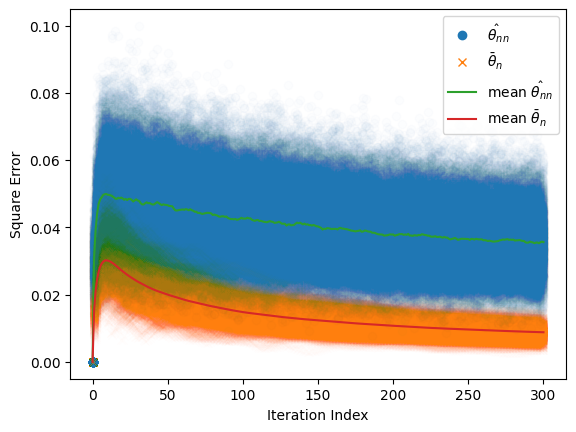

In [14]:
fig1, ax1 = common.plot_error_data(
    theta_data,
    theta_star,
    # ylim=[0,0.0015],
)

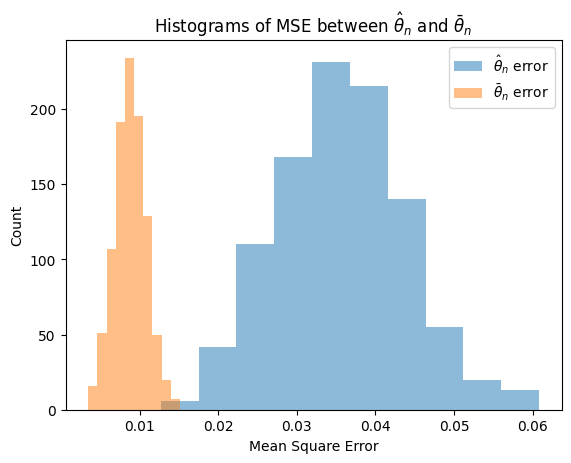

In [15]:
fig2, ax2 = common.plot_error_histogram(
    theta_data,
    theta_star,
)